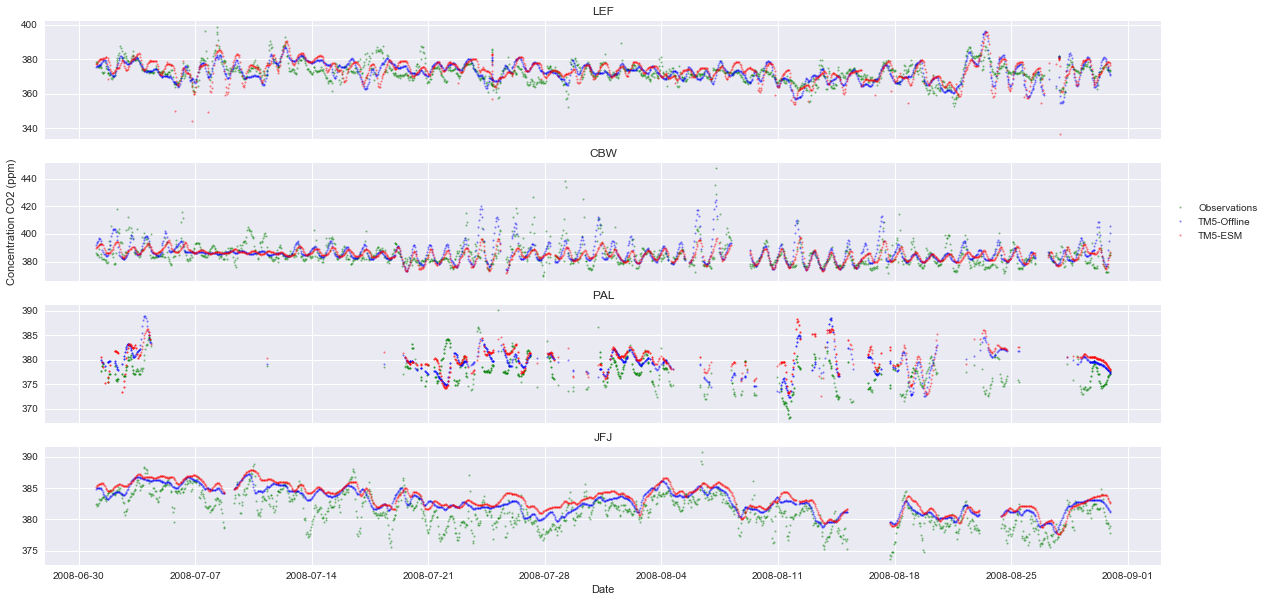

In [12]:
#1. TIME SERIES PLOT FOR SELECTED STATIONS
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)
#Select the timeframe to make the plots
df = df[(df.G_date>'2008-07-01') & (df.G_date<'2008-08-31')]

CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) & (df.D_alt>150) & (df.D_alt<200)#Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland
#print(df[JFJ])

f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, sharex=True,figsize=(20, 10))
size = 2
alpha=.5
mask = LEF
ax1.set_title('LEF')
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=CBW
ax2.set_title('CBW')
ax2.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax2.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax2.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=PAL
ax3.set_title('PAL')
ax3.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax3.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax3.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=JFJ
ax4.set_title('JFJ')
ax4.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax4.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax4.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set(ylabel='Concentration CO2 (ppm)')
ax4.set(xlabel='Date')
plt.savefig('timeseries_jul-aug_newmeteo.png')
plt.show()

In [11]:
#2. TIME SERIES PLOT FOR SELECTED STATIONS with errorbars - errorbars very small due to the very similar ensemble members
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = knmipath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fmp_obs1 = []
fmp_obs2 = []
fmp_obs3 = []
fmp_obs4 = []
fmp_obs5 = []
fmp_obs6 = []
fmp_obs7 = []
fmp_obs8 = []
fmp_obs9 = []

fesm_obs0 = []
fesm_obs1 = []
fesm_obs2 = []
fesm_obs3 = []
fesm_obs4 = []
fesm_obs5 = []
fesm_obs6 = []
fesm_obs7 = []
fesm_obs8 = []
fesm_obs9 = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fmp_obs1 = np.append(fmp_obs1,flask_mp_fh.variables['flask'][:x,1])
            fmp_obs2 = np.append(fmp_obs2,flask_mp_fh.variables['flask'][:x,2])
            fmp_obs3 = np.append(fmp_obs3,flask_mp_fh.variables['flask'][:x,3])
            fmp_obs4 = np.append(fmp_obs4,flask_mp_fh.variables['flask'][:x,4])
            fmp_obs5 = np.append(fmp_obs5,flask_mp_fh.variables['flask'][:x,5])
            fmp_obs6 = np.append(fmp_obs6,flask_mp_fh.variables['flask'][:x,6])
            fmp_obs7 = np.append(fmp_obs7,flask_mp_fh.variables['flask'][:x,7])
            fmp_obs8 = np.append(fmp_obs8,flask_mp_fh.variables['flask'][:x,8])
            fmp_obs9 = np.append(fmp_obs9,flask_mp_fh.variables['flask'][:x,9])
            
            fesm_obs0 = np.append(fesm_obs0,flask_esm_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs1 = np.append(fesm_obs1,flask_esm_fh.variables['flask'][:x,1])
            fesm_obs2 = np.append(fesm_obs2,flask_esm_fh.variables['flask'][:x,2])
            fesm_obs3 = np.append(fesm_obs3,flask_esm_fh.variables['flask'][:x,3])
            fesm_obs4 = np.append(fesm_obs4,flask_esm_fh.variables['flask'][:x,4])
            fesm_obs5 = np.append(fesm_obs5,flask_esm_fh.variables['flask'][:x,5])
            fesm_obs6 = np.append(fesm_obs6,flask_esm_fh.variables['flask'][:x,6])
            fesm_obs7 = np.append(fesm_obs7,flask_esm_fh.variables['flask'][:x,7])
            fesm_obs8 = np.append(fesm_obs8,flask_esm_fh.variables['flask'][:x,8])
            fesm_obs9 = np.append(fesm_obs9,flask_esm_fh.variables['flask'][:x,9])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()
            

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs0*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)

ensemble = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                        'mp0' : fmp_obs0*1000000,
                        'mp1' : fmp_obs1*1000000,
                        'mp2' : fmp_obs2*1000000,
                        'mp3' : fmp_obs3*1000000,
                        'mp4' : fmp_obs4*1000000,
                        'mp5' : fmp_obs5*1000000,
                        'mp6' : fmp_obs6*1000000,
                        'mp7' : fmp_obs7*1000000,
                        'mp8' : fmp_obs8*1000000,
                        'mp9' : fmp_obs9*1000000,
                        'esm0' : fesm_obs0*1000000,
                        'esm1' : fesm_obs1*1000000,
                        'esm2' : fesm_obs2*1000000,
                        'esm3' : fesm_obs3*1000000,
                        'esm4' : fesm_obs4*1000000,
                        'esm5' : fesm_obs5*1000000,
                        'esm6' : fesm_obs6*1000000,
                        'esm7' : fesm_obs7*1000000,
                        'esm8' : fesm_obs8*1000000,
                        'esm9' : fesm_obs9*1000000,
                        'D_alt'     : alt,
                        'E_lat'     : lat,
                        'F_lon'     : lon,
                        'G_date'    : time},index=obs_num)
                  

CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland

CBW = (ensemble.E_lat>51) & (ensemble.E_lat<52) & (ensemble.F_lon>4) & (ensemble.F_lon<5) #Cabauw in the Netherlands
PAL = (ensemble.E_lat>67) & (ensemble.E_lat<68) & (ensemble.F_lon>24) & (ensemble.F_lon<25) #PALLAS in Finland
mask = CBW

ensemble = ensemble[mask]
#print(fmp.duplicated('G_date'))
#print(df[JFJ])
sns.tsplot(ensemble.A_fin_obs, color='g',alpha=.2)
sns.tsplot([ensemble.mp0,ensemble.mp1,ensemble.mp2,ensemble.mp3,ensemble.mp4,ensemble.mp5,
            ensemble.mp6,ensemble.mp7,ensemble.mp8,ensemble.mp9],color='b',alpha=.2)
sns.tsplot([ensemble.esm0,ensemble.esm1,ensemble.esm2,ensemble.esm3,ensemble.esm4,ensemble.esm5,
            ensemble.esm6,ensemble.esm7,ensemble.esm8,ensemble.esm9],color='r',alpha=.2)
plt.show()

<bound method NDFrame.head of           A_fin_obs   B_fmp_obs  C_fesm_obs  D_alt      E_lat    F_lon  \
24908.0  409.310014  420.544267  505.697331  990.0  47.801102  11.0245   

                     G_date  
24908.0 2009-01-07 11:55:00  >


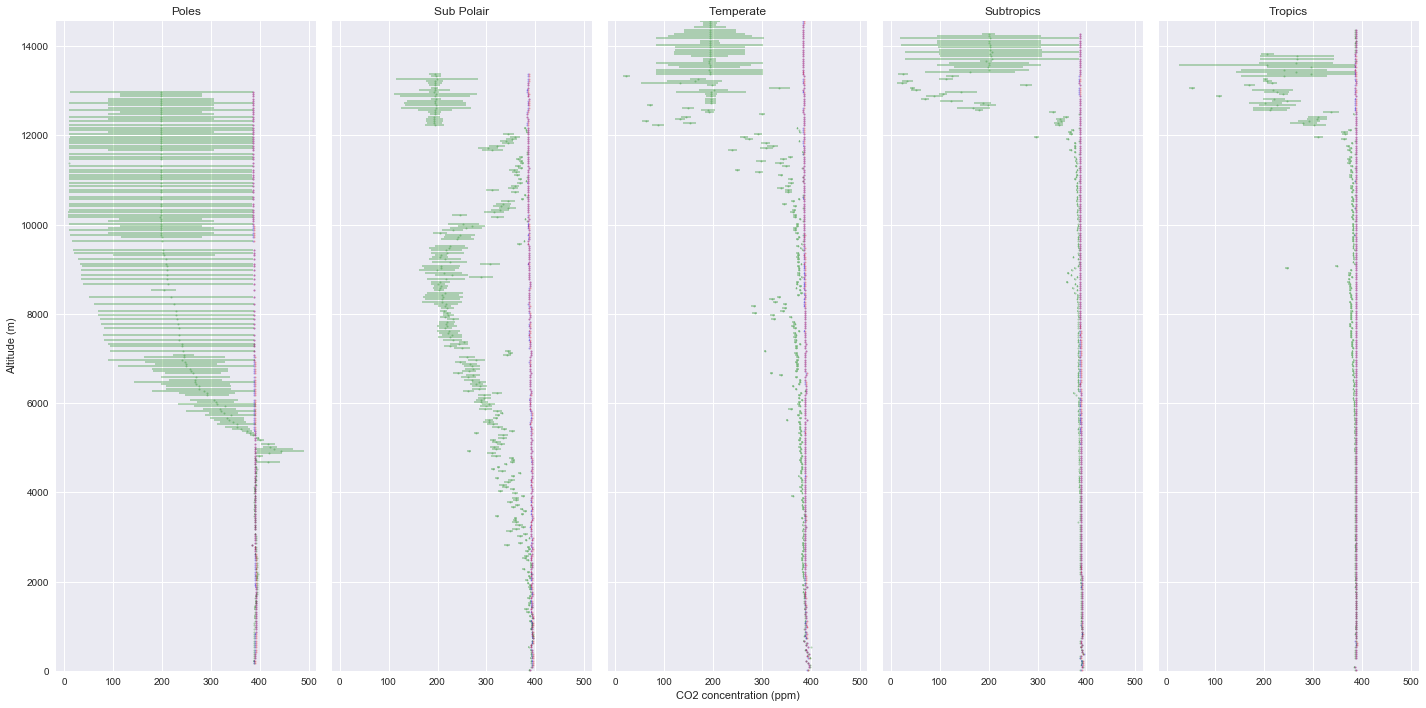

In [102]:
#3. Altitude plots
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)


CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200) #Global mask to view all the data

POL = (df.E_lat>80) & (df.E_lat<100) & (df.A_fin_obs <500)| (df.E_lat<-80) & (df.E_lat>=-100) & (df.A_fin_obs <500)   # Poles
SUBPOL = (df.E_lat>60) & (df.E_lat<=80) & (df.A_fin_obs <500) | (df.E_lat<-60) & (df.E_lat>=-80) & (df.A_fin_obs <500) # Subpolair areas
TEM = (df.E_lat>40) & (df.E_lat<=60) & (df.A_fin_obs <500) | (df.E_lat<-40) & (df.E_lat>=-60) & (df.A_fin_obs <500)    # Temperate zones
SUBTRO = (df.E_lat>20) & (df.E_lat<=40) & (df.A_fin_obs <500) | (df.E_lat<-20) & (df.E_lat>=-40) & (df.A_fin_obs <500) # Subtropics
TRO = (df.E_lat>-20) & (df.E_lat<=20) & (df.A_fin_obs <500)                                      # Tropics

HIGH = (df.C_fesm_obs>500) 
print(df[HIGH].head)

f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(20, 10))
size = 2
alpha=.3
mask = POL

# df['A_fin_obs'] = df['A_fin_obs']*1000000
# df['B_fmp_obs'] = df['B_fmp_obs']*1000000
# df['C_fesm_obs'] = df['C_fesm_obs']*1000000


#sys.exit()


#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax1.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax1.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax1.set_title("Poles")
#plt.xlim(380,420)
plt.ylim(0,max(df.D_alt))

mask = SUBPOL
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax2.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax2.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax2.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax2.set_title("Sub Polair")
mask = TEM
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax3.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax3.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax3.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax3.set_title("Temperate")
mask = SUBTRO
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax4.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax4.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax4.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax4.set_title("Subtropics")
mask = TRO
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax5.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax5.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax5.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax5.set_title("Tropics")

ax1.set(ylabel='Altitude (m)')
ax3.set(xlabel='CO2 concentration (ppm)')
plt.tight_layout()
plt.show()

In [ ]:
#4. latitude heatmap
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
#        if file.startswith('sample_coordinates_2007110300_2007111000.nc'):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc},index=obs_num)
df = df[(df.A_fin_obs<450) & (df.A_fin_obs>350)]
df['month'] = pd.DatetimeIndex(df['G_date']).month
df['year'] = pd.DatetimeIndex(df['G_date']).year
df['cum_month'] = df['month']-11+(12*(df['year']-2007))
#print(df['I_obs_loc'=='ces'])


#Difference between TM5-Offline and TM5-ESM, positive means TM5-Offline is larger.
df['H_diff_models'] = df['B_fmp_obs']-df['C_fesm_obs']
df['I_diff_mp_obs'] = df['B_fmp_obs']-df['A_fin_obs']
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200) #Global mask to view all the data
mask=GLOB

# Calculate the mean of all the values that fit in the numpy array boxes and use the unstack function to get rid of the multi-index dataframe
lat_diff_obs_mean = df[mask]['H_diff_models'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()
lat_diff_mp_obs = df[mask]['I_diff_mp_obs'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()


# invert the altitude axis
lat_diff_obs_mean = lat_diff_obs_mean.reindex(index=lat_diff_obs_mean.index[::-1])
lat_diff_mp_obs = lat_diff_mp_obs.reindex(index=lat_diff_mp_obs.index[::-1])

print(lat_diff_mp_obs)

alt_index = np.arange(12500,-500,-1000)
lat_index = np.arange(-85,95,10)

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(lat_diff_obs_mean,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu", vmin=-5, vmax=5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title='Mean difference between calculated CO2 concentration of TM5-Offline and TM5-ESM in ppm')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(8)
plt.show()

f, (ax1) = plt.subplots(1, 1)   
ax1 = sns.heatmap(lat_diff_mp_obs,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu", vmin=-5, vmax=5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title='Mean difference between calculated CO2 concentration of TM5-Offline and the observations in ppm')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(8)
plt.show()

#Calculate the monthly mean of the differences between the models for every latitudebox
time_diff_obs_mean = df[mask]['H_diff_models'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
time_diff_mp_obs = df[mask]['I_diff_mp_obs'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
print(time_diff_obs_mean)
print(time_diff_mp_obs)
timeindex = np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1)
print(timeindex)

# invert the latitude axis
time_diff_obs_mean = time_diff_obs_mean.reindex(index=time_diff_obs_mean.index[::-1])
time_diff_mp_obs = time_diff_mp_obs.reindex(index=time_diff_mp_obs.index[::-1])

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(time_diff_obs_mean,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu", vmin=-5, vmax=5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title='Mean monthly difference between calculated CO2 concentration of TM5-Offline and TM5-ESM in ppm')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(8)
plt.show()

f, (ax1) = plt.subplots(1, 1)   
ax1 = sns.heatmap(time_diff_mp_obs,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu", vmin=-5, vmax=5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title='Mean monthly difference between calculated CO2 concentration of TM5-Offline and the observations in ppm')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(8)
plt.show()

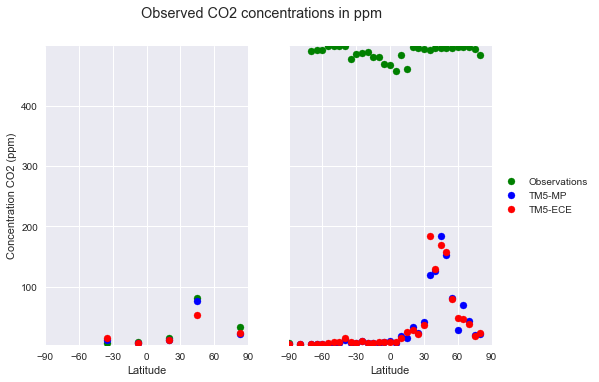

In [19]:
#5. amplitude - latitude plot
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)
df = df[df.A_fin_obs<500]

MLO = (df.E_lat>19) & (df.E_lat<20) & (df.F_lon>-155) & (df.F_lon<-154) #Mauna Loa, Hawai, US
ALT = (df.E_lat>82) & (df.E_lat<83) & (df.F_lon>-63) & (df.F_lon<-62) #Alert, Alaska, US
ASC = (df.E_lat>-8) & (df.E_lat<-7) & (df.F_lon>-15) & (df.F_lon<-14) #Ascencion Island (Middle Atlantic)
AMT = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-69) & (df.F_lon<-68) #Argyle, Maine, US
CPT = (df.E_lat>-36) & (df.E_lat<-35) & (df.F_lon>18) & (df.F_lon<19) #Cape Town, South Africa
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200) #Global mask to view all the data
masks = [MLO,ALT,ASC,AMT,CPT]

#For stations: empty arrays, filled with the difference between the min and the max value at each location. The 'lat' array
#consists of the latitude of the station
fin_diff = []
fmp_diff = []
fesm_diff = []
lat = []
for mask in masks:
    fin_diff=np.append(fin_diff,(df[mask]['A_fin_obs'].max()-df[mask]['A_fin_obs'].min()))
    fmp_diff=np.append(fmp_diff,(df[mask]['B_fmp_obs'].max()-df[mask]['B_fmp_obs'].min()))
    fesm_diff=np.append(fesm_diff,(df[mask]['C_fesm_obs'].max()-df[mask]['C_fesm_obs'].min()))
    lat =  np.append(lat,df[mask]['E_lat'].max())

                                                                                               
# Calculate some statistics of all the values that fit in the numpy array boxes and calculate the amplitude of the timeseries
lat_fin_obs = df['A_fin_obs'].groupby(pd.cut(df['E_lat'],np.arange(-90,95,5))).agg({'mean':np.mean,'min':np.min,'max':np.max})
lat_fin_obs['diff'] = lat_fin_obs['max']-lat_fin_obs['min']

lat_fmp_obs = df['B_fmp_obs'].groupby(pd.cut(df['E_lat'],np.arange(-90,95,5))).agg({'mean':np.mean,'min':np.min,'max':np.max})
lat_fmp_obs['diff'] = lat_fmp_obs['max']-lat_fmp_obs['min']

lat_fesm_obs = df['C_fesm_obs'].groupby(pd.cut(df['E_lat'],np.arange(-90,95,5))).agg({'mean':np.mean,'min':np.min,'max':np.max})
lat_fesm_obs['diff'] = lat_fesm_obs['max']-lat_fesm_obs['min']

f, (ax1,ax2) = plt.subplots(1, 2,sharey=True,sharex=True)
plt.suptitle('Observed CO2 concentrations in ppm')
size = 2
alpha=.3

ax1.scatter(lat,fin_diff,color='g', label='Observations')
ax1.scatter(lat,fmp_diff,color='b', label='TM5-MP')
ax1.scatter(lat,fesm_diff,color='r', label='TM5-ECE')
ax2.scatter(np.arange(-90,90,5),lat_fin_obs['diff'],color='g', label='Observations')
ax2.scatter(np.arange(-90,90,5),lat_fmp_obs['diff'],color='b', label='TM5-MP')
ax2.scatter(np.arange(-90,90,5),lat_fesm_obs['diff'],color='r', label='TM5-ECE')
ax1.set(xlabel='Latitude', ylabel='Concentration CO2 (ppm)')
ax2.set(xlabel='Latitude')

plt.ylim(np.min(lat_fin_obs['diff']),np.max(lat_fin_obs['diff']))
plt.xlim(-90,90)
plt.xticks(np.arange(-90, 90+30, 30))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

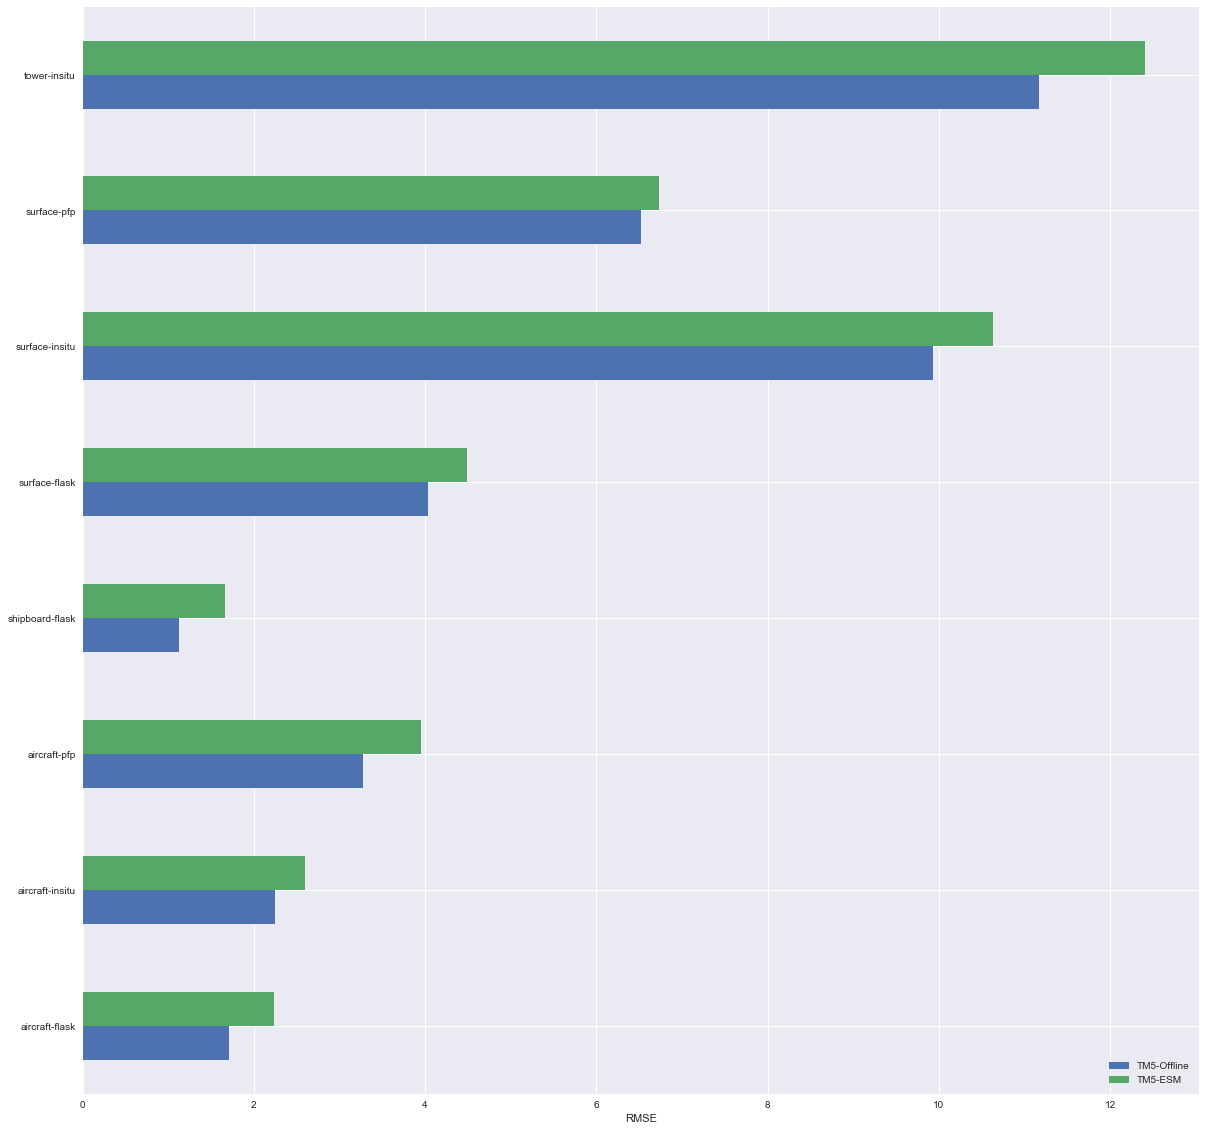

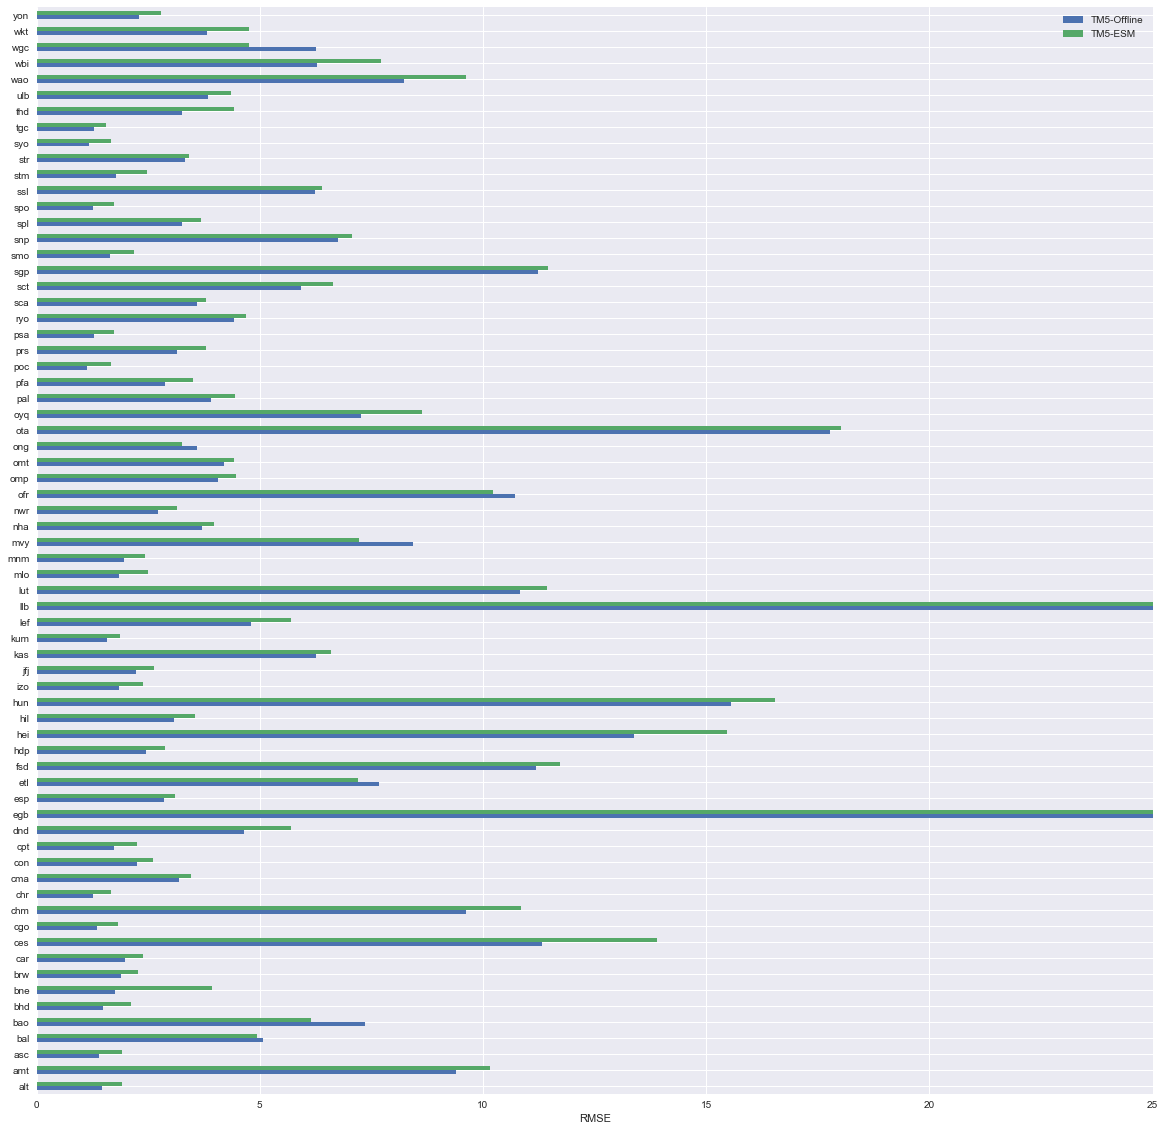

In [247]:
#6 Bar charts with the RMSE of the different stations and different type. 
#  Code extension allows to easily switch the timeseries graph for any chosen station.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
#        if file.startswith('sample_coordinates_2007110300_2007111000.nc'):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc},index=obs_num)

#Select the timeframe to make the plots
df = df[(df.G_date>'2008-07-01') & (df.G_date<'2008-08-31')]

CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) & (df.D_alt>150) & (df.D_alt<200)#Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland

# print(df['H_obs_id'].value_counts())
# print(df['I_obs_loc'].value_counts())

#print(df['I_obs_loc'].value_counts())
#print(df[CBW])
#print(df[PAL]['H_obs_id'].value_counts())
#print(df[LEF]['H_obs_id'].value_counts())
#print(df[JFJ]['H_obs_id'].value_counts())

#remove values with too high observations
df = df[df.A_fin_obs<500]
#calculate difference between models and observations and square it
df['J_TM5_offline'] = (df['B_fmp_obs']-df['A_fin_obs'])**2
df['K_TM5_ESM'] = (df['C_fesm_obs']-df['A_fin_obs'])**2

#calculation of RMSE for the types of measurements
#group the difference(column-J) by type and give the mean and the count, two dataframes, Offline and ESM
sample_type_off = df['J_TM5_offline'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_esm = df['K_TM5_ESM'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
#Merge the two dataframes together
pieces_type = [sample_type_off,sample_type_esm]
sample_type=pd.concat(pieces_type,keys=['TM5-Offline','TM5-ESM'])
#Calculate the RMSE by giving the sqrt of the mean (mean was the square of the differences for each type)
sample_type['RMSE']=np.sqrt(sample_type['mean'])

#calculation of RMSE of the different locations of measurement, see above for method
#Use only stations with 20 or more measurements
count_loc = df['I_obs_loc'].value_counts()
count_loc[count_loc > 19]
df_loc = df[df['I_obs_loc'].isin(count_loc[count_loc > 9].index)]
sample_loc_off = df_loc['J_TM5_offline'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_esm = df_loc['K_TM5_ESM'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
pieces_loc = [sample_loc_off,sample_loc_esm]
sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-ESM'])
sample_loc['RMSE']=np.sqrt(sample_loc['mean'])


#Plot the dataframes in barplots. First unstack them, keeping only the RMSE
plot_type=sample_type['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax1 = plot_type.plot.barh(figsize=(20,20))
#plt.savefig('RMSE_type.png')
plot_loc=sample_loc['RMSE'].unstack(level=0)
plot_loc.index.name = ''
ax2 = plot_loc.plot.barh(figsize=(20,20))
ax1.set_xlabel("RMSE")
ax2.set_xlabel("RMSE")
plt.xlim(0,25)
#plt.savefig('RMSE_stations.png')
plt.show()

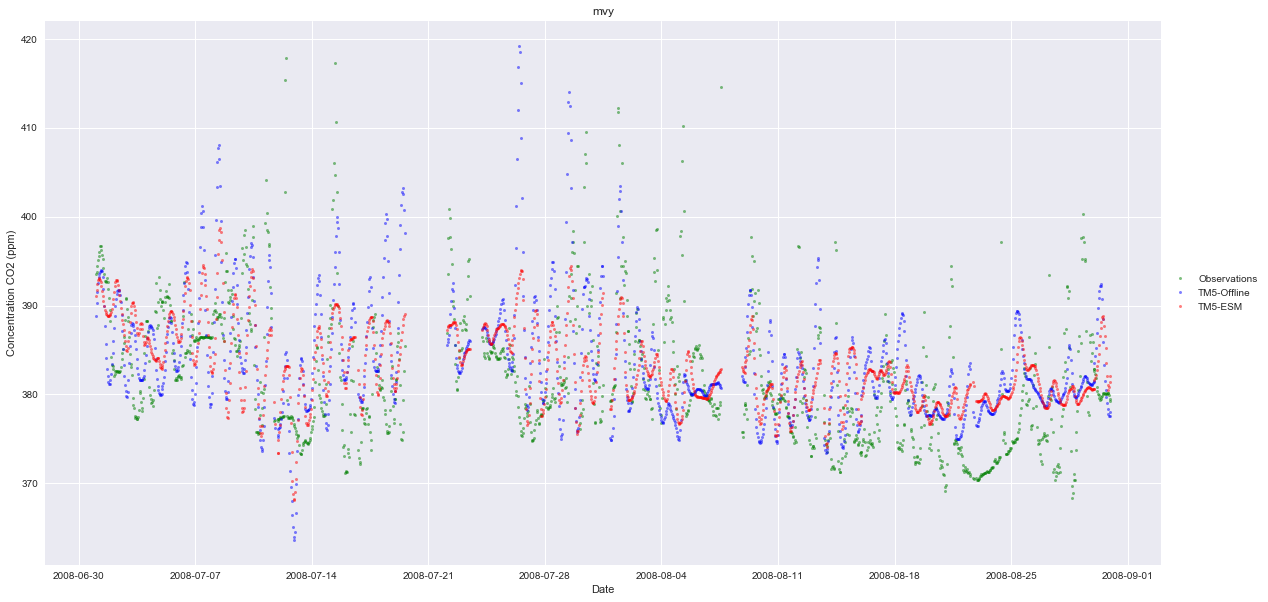

In [249]:
# Timeseries of chosen plot (comparable to figure 1), uses the data calculated by the previous block. 
# Can afterwards be run multiple times for chosen stations
f, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(20, 10))
size = 3
alpha=.5
mask_loc = 'mvy'
mask = (df.I_obs_loc==mask_loc)
ax1.set_title(mask_loc) #Add full station name if plot is saved
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set(ylabel='Concentration CO2 (ppm)')
ax1.set(xlabel='Date')
plt.show()

#print(df[df.H_obs_id=='tower-insitu'])

aircraft-insitu    500849
aircraft-pfp         3832
aircraft-flask        271
Name: H_obs_id, dtype: int64
con    477303
arc     23817
etl       372
sgp       369
esp       338
pfa       301
nha       282
wbi       282
car       278
lef       234
tgc       220
cma       217
sca       171
hil       148
thd       144
bne       137
ulb       119
dnd       103
haa        73
rta        44
Name: I_obs_loc, dtype: int64
arc    23817
etl      372
sgp      369
esp      338
pfa      301
wbi      282
nha      282
car      278
lef      234
tgc      220
cma      217
sca      171
hil      148
thd      144
bne      137
ulb      119
dnd      103
haa       73
rta       44
Name: I_obs_loc, dtype: int64
       A_fin_obs  B_fmp_obs  C_fesm_obs
month                                  
1.0     2.722739   2.432906    2.334451
2.0     2.384366   2.300470    2.289179
3.0     2.595207   2.039810    2.040779
4.0     2.466960   1.611670    1.952141
5.0     0.611572   0.367509    0.366156
6.0    -0.937015  -1.54144

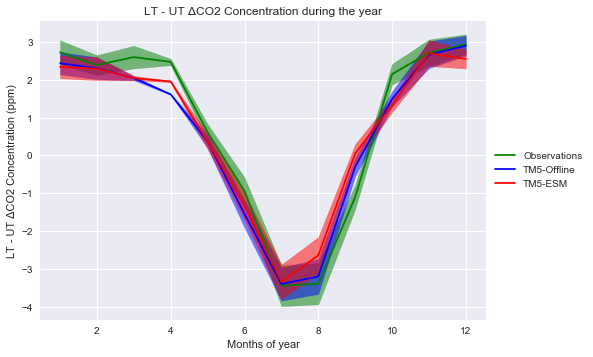

In [485]:
#7 UT-LT delta CO2 plot
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
#        if file.startswith('sample_coordinates_2007110300_2007111000.nc'):
        if file.startswith('sample_coordinates_2008'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc},index=obs_num)
df = df[(df.A_fin_obs<450) & (df.A_fin_obs>350)]
df = df[(df.H_obs_id=='aircraft-flask') | (df.H_obs_id=='aircraft-pfp') | (df.H_obs_id=='aircraft-insitu')]
print(df.H_obs_id.value_counts())
print(df.I_obs_loc.value_counts())
df = df[df.I_obs_loc != 'con']
print(df.I_obs_loc.value_counts())

#Select the altitude to make the plots
df = df[(df.D_alt<3000) | (df.D_alt>3000) & (df.D_alt<7000)]
#Create new column, everything lower than 2000m is in the LT and the rest is in the UT
df['J_tropo'] = np.where(df['D_alt']<3000, 'LT', 'UT')

df['month'] = pd.DatetimeIndex(df['G_date']).month

LT_df = df[df.J_tropo=='LT']
UT_df = df[df.J_tropo=='UT']

UT_mean = df.groupby(UT_df['month']).mean()
UT_mean = UT_mean[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
UT_count = df.groupby(UT_df['month']).count()
UT_count = UT_count[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
UT_std = df.groupby(UT_df['month']).std()
UT_std = UT_std[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
UT_ste = UT_std/(np.sqrt(UT_count))

LT_mean = df.groupby(LT_df['month']).mean()
LT_mean = LT_mean[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
LT_count = df.groupby(LT_df['month']).count()
LT_count = LT_count[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
LT_std = df.groupby(LT_df['month']).std()
LT_std = LT_std[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
LT_ste = LT_std/(np.sqrt(LT_count))

LT_UT_mean = LT_mean-UT_mean
LT_UT_ste = np.sqrt(UT_ste**2 + LT_ste**2)
print(LT_UT_mean)
print(LT_UT_ste)

f, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True)
size = 2
alpha=.3
months = 1+np.arange(12)

ax1.set_title("LT - UT ΔCO2 Concentration during the year")
ax1.plot(months,LT_UT_mean['A_fin_obs'], color = 'g', ms=size,label='Observations')
ax1.fill_between(months, LT_UT_mean['A_fin_obs']-LT_UT_ste['A_fin_obs'], LT_UT_mean['A_fin_obs']+LT_UT_ste['A_fin_obs'],
    alpha=0.5, edgecolor='g', facecolor='g')
ax1.plot(months,LT_UT_mean['B_fmp_obs'], color = 'b', ms=size,label='TM5-Offline')
ax1.fill_between(months, LT_UT_mean['B_fmp_obs']-LT_UT_ste['B_fmp_obs'], LT_UT_mean['B_fmp_obs']+LT_UT_ste['B_fmp_obs'],
    alpha=0.5, edgecolor='b', facecolor='b')
ax1.plot(months,LT_UT_mean['C_fesm_obs'], color = 'r', ms=size,label='TM5-ESM')
ax1.fill_between(months, LT_UT_mean['C_fesm_obs']-LT_UT_ste['C_fesm_obs'], LT_UT_mean['C_fesm_obs']+LT_UT_ste['C_fesm_obs'],
    alpha=0.5, edgecolor='r', facecolor='r')
ax1.set(xlabel='Months of year', ylabel='LT - UT ΔCO2 Concentration (ppm)')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('delta concentration no con flight data.png')
plt.show()


#Old method, with some regional selection
# TRO = (df.E_lat>-20) & (df.E_lat<20) 
# NH = (df.E_lat>20) & (df.E_lat<90)
# SH = (df.E_lat>-90) & (df.E_lat<-20) 

# mask = TRO
# TRO_df = df[TRO]
# TRO_mean = TRO_df.groupby(TRO_df['J_tropo']).mean()
# TRO_mean = TRO_mean[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
# TRO_mean = TRO_mean.transpose()

# SH_df = df[SH]
# SH_mean = SH_df.groupby(SH_df['J_tropo']).mean()
# SH_mean = SH_mean[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
# SH_mean = SH_mean.transpose()

# NH_df = df[NH]
# NH_mean = NH_df.groupby(NH_df['J_tropo']).mean()
# NH_mean = NH_mean[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
# NH_mean = NH_mean.transpose()

# plot_mean = pd.DataFrame(index=('A_fin_obs','B_fmp_obs','C_fesm_obs'))
# plot_mean['Southern_Hemisphere'] = SH_mean['UT']-SH_mean['LT']
# plot_mean['Tropics'] = TRO_mean['UT']-TRO_mean['LT']
# plot_mean['Northern_Hemisphere'] = NH_mean['UT']-NH_mean['LT']
# plot_mean = plot_mean.transpose()
# plot_mean = plot_mean.reset_index()
# print(plot_mean)

# f, (ax1) = plt.subplots(1, 1,sharey=True,sharex=True)
# alpha = .8
# ax1.scatter(x=plot_mean.index, y=plot_mean.A_fin_obs, color='g', alpha=alpha, label='Observations')
# ax1.scatter(x=plot_mean.index, y=plot_mean.B_fmp_obs, color='b', alpha=alpha, label='TM5-Offline')
# ax1.scatter(x=plot_mean.index, y=plot_mean.C_fesm_obs, color='r', alpha=alpha, label='TM5-ESM')
# x = [0,1,2]
# labels = ['Southern Hemisphere', 'Tropics', 'Northern Hemisphere']
# plt.xticks(x, labels)
# plt.xlim(-0.5,2.5)
# ax1.set(xlabel='', ylabel='UT - LT ΔCO2 Concentration (ppm)')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

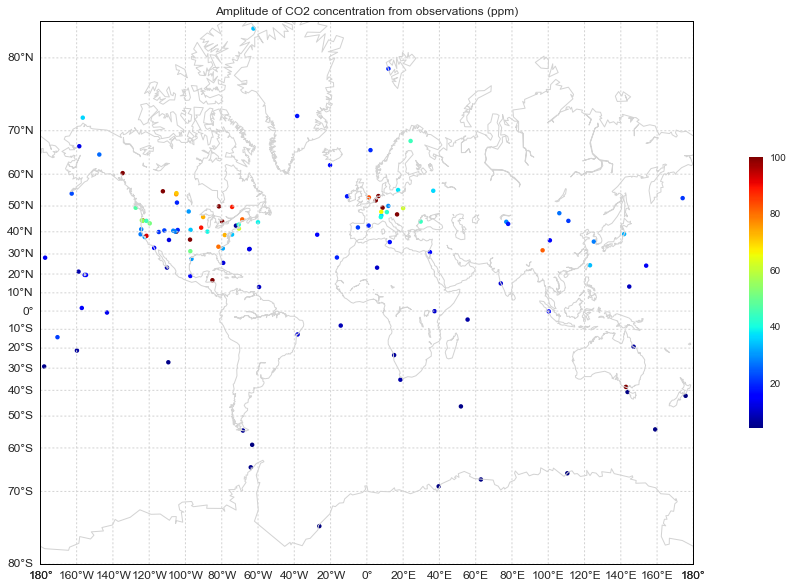

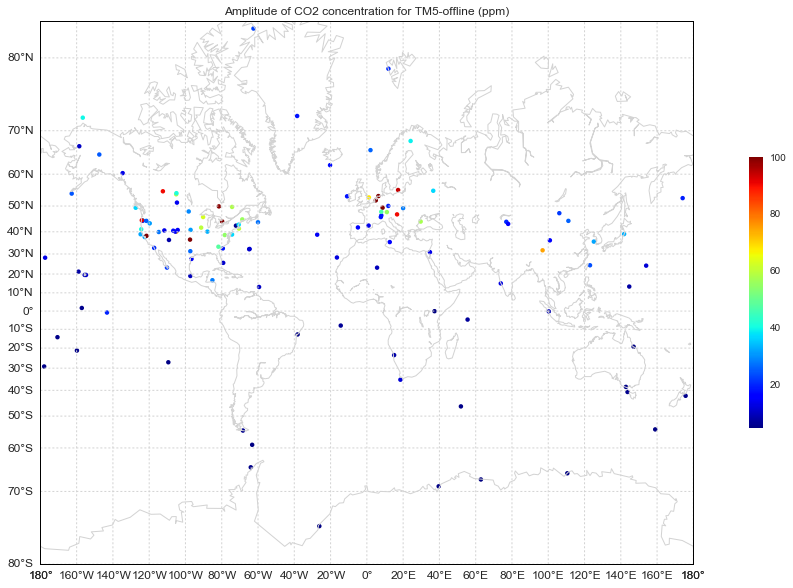

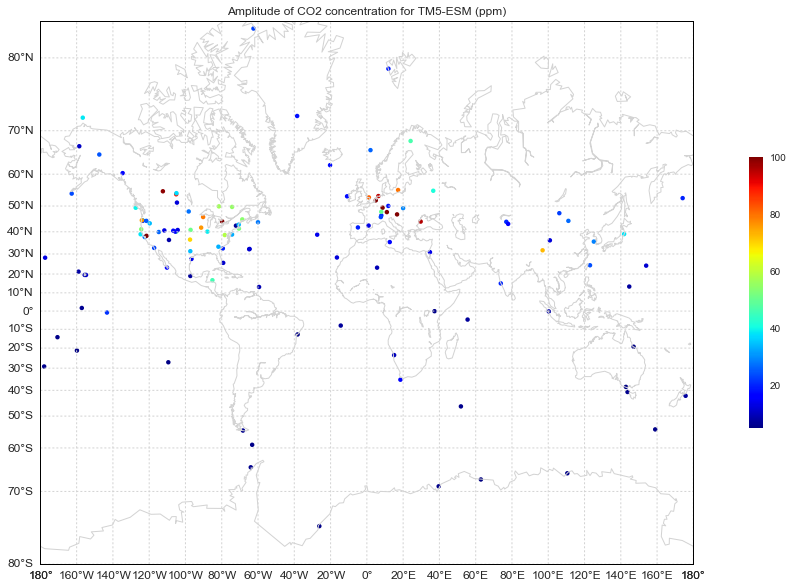

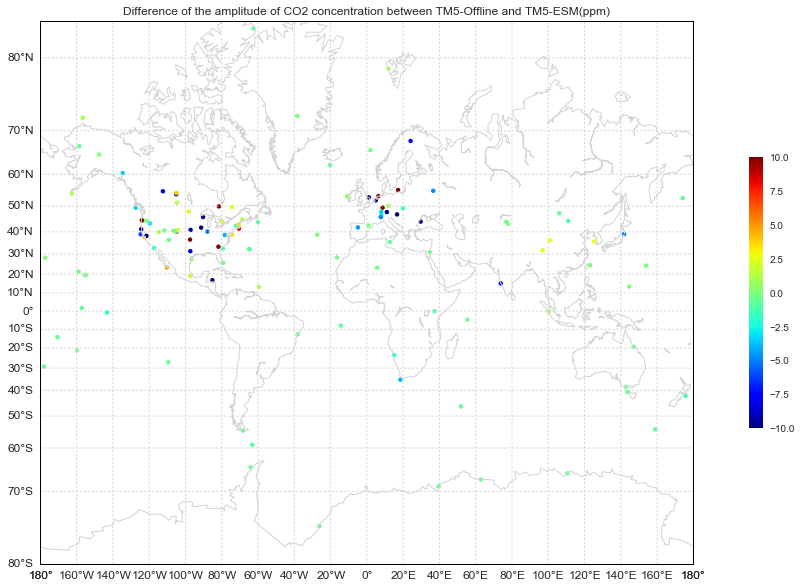

In [218]:
#8 Amplitude plot - Use CCGCRV amplitude plot (next cells)
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
from mpl_toolkits.basemap import Basemap

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
#        if file.startswith('sample_coordinates_2007110300_2007111000.nc'):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc},index=obs_num)
df = df[df.A_fin_obs<500]
#Use only stations with 10 or more measurements
count_loc = df['I_obs_loc'].value_counts()
count_loc[count_loc > 9]
df = df[df['I_obs_loc'].isin(count_loc[count_loc > 9].index)]

latlon = df[['E_lat','F_lon']].groupby(df['I_obs_loc']).mean()

obs_df = df['A_fin_obs'].groupby(df['I_obs_loc']).agg({'obs_mean':np.mean,'obs_min':np.min,'obs_max':np.max})
obs_df['obs_diff'] = obs_df['obs_max']-obs_df['obs_min']
plot_df=pd.concat([obs_df,latlon],axis=1)

mp_df = df['B_fmp_obs'].groupby(df['I_obs_loc']).agg({'mp_mean':np.mean,'mp_min':np.min,'mp_max':np.max})
mp_df['mp_diff'] = mp_df['mp_max']-mp_df['mp_min']
plot_df=pd.concat([plot_df,mp_df],axis=1)

esm_df = df['C_fesm_obs'].groupby(df['I_obs_loc']).agg({'esm_mean':np.mean,'esm_min':np.min,'esm_max':np.max})
esm_df['esm_diff'] = esm_df['esm_max']-esm_df['esm_min']
plot_df=pd.concat([plot_df,esm_df],axis=1)

plot_df['offline-esm']=plot_df['mp_diff']-plot_df['esm_diff']

plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=83,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False],color='lightgrey')
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration from observations (ppm)")
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = np.min(plot_df['obs_diff'].values)
max_value = np.max(plot_df['obs_diff'].values)
max_value=100
sc = plt.scatter(x,y, c=plot_df['obs_diff'].values, vmin=min_value, vmax =max_value, cmap=jet, s=20, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('')
plt.savefig('amplitude_observations.png')
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=83,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False],color='lightgrey')
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration for TM5-offline (ppm)")
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = np.min(plot_df['mp_diff'].values)
max_value = np.max(plot_df['mp_diff'].values)
max_value=100
sc = plt.scatter(x,y, c=plot_df['mp_diff'].values, vmin=min_value, vmax =max_value, cmap=jet, s=20, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('')
plt.savefig('amplitude_TM5-offline.png')
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=83,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False],color='lightgrey')
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration for TM5-ESM (ppm)")
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = np.min(plot_df['esm_diff'].values)
max_value = np.max(plot_df['esm_diff'].values)
max_value=100
sc = plt.scatter(x,y, c=plot_df['esm_diff'].values, vmin=min_value, vmax =max_value, cmap=jet, s=20, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('')
plt.savefig('amplitude_tm5-esm.png')
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=83,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False],color='lightgrey')
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Difference of the amplitude of CO2 concentration between TM5-Offline and TM5-ESM(ppm)")
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = -10
max_value = np.max(plot_df['offline-esm'].values)
max_value=10
sc = plt.scatter(x,y, c=plot_df['offline-esm'].values, vmin=min_value, vmax =max_value, cmap=jet, s=20, edgecolors='none')
# And let's include that colorbar 
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('')
plt.savefig('amplitude_difference.png')
plt.show()

In [423]:
#9 - Calculating amplitude using CCG-Curve
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
from mpl_toolkits.basemap import Basemap

from datetime import datetime as datetime_dt
import time
def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = datetime_dt(year=year, month=1, day=1)
    startOfNextYear = datetime_dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

sys.path.insert(0, '/Users/killaars/bin/ccgcrv/')
from ccgcrv import ccgcrv

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time_obs = []
dates=[]
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
#        if file.startswith('sample_coordinates_200801'):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            dates_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
                dates_intermediate[i] = dt
            time_obs = np.append(time_obs,time_intermediate)
            dates = np.append(dates,dates_intermediate)
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time_obs,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'J_dates'   : dates},index=obs_num)

df = df[(df.A_fin_obs<500) & (df.A_fin_obs>350)]

#Use only stations with 10 or more measurements
count_loc = df['I_obs_loc'].value_counts()
df = df[df['I_obs_loc'].isin(count_loc[count_loc > 9].index)]

plot_df = df[['E_lat','F_lon']].groupby(df['I_obs_loc']).mean()
print(plot_df)

plot_df['amp_obs'] = ''
plot_df['amp_mp'] = ''
plot_df['amp_esm'] = ''
for loc in plot_df.index.values:
    print(loc)
    loop_df = df[df.I_obs_loc==loc]
    loop_df = loop_df.set_index(loop_df.G_date)
    loop_df['fracyear'] = loop_df.J_dates.apply(toYearFraction)
    
    years_obs,ampmin_obs,ampmax_obs=ccgcrv(x=loop_df.fracyear.values,y=loop_df.A_fin_obs.values,func='amp')
    amp_obs = np.array(ampmax_obs)-np.array(ampmin_obs)
    amp_obs = np.mean(amp_obs[1:3])

    years_mp,ampmin_mp,ampmax_mp=ccgcrv(x=loop_df.fracyear.values,y=loop_df.B_fmp_obs.values,func='amp')
    amp_mp = np.array(ampmax_mp)-np.array(ampmin_mp)
    amp_mp = np.mean(amp_mp[1:3])

    years_esm,ampmin_esm,ampmax_esm=ccgcrv(x=loop_df.fracyear.values,y=loop_df.C_fesm_obs.values,func='amp')
    amp_esm = np.array(ampmax_esm)-np.array(ampmin_esm)
    amp_esm = np.mean(amp_esm[1:3])
    
    plot_df.set_value(loc, 'amp_obs', amp_obs)
    plot_df.set_value(loc, 'amp_mp', amp_mp)
    plot_df.set_value(loc, 'amp_esm', amp_esm)
print(plot_df)
plot_df['offline-esm'] = plot_df['amp_mp']-plot_df['amp_esm']



               E_lat       F_lon
I_obs_loc                       
abp       -12.770000  -38.169998
acg        66.859549 -158.547584
alt        82.450798  -62.507198
amt        45.034454  -68.682077
arc        59.918186 -133.841740
asc        -7.966700  -14.400000
ask        23.262501    5.632200
azr        38.770000  -27.379444
bal        55.349998   17.219714
bao        40.049999 -105.003998
bcs        23.299999 -110.199997
bhd       -42.259538  175.722242
bkt        -0.200444  100.319000
bme        32.368000  -64.647598
bmw        32.264702  -64.878799
bne        40.796589  -97.176673
bra        51.200001 -104.699997
brw        72.317508 -156.610933
bsc        44.177601   29.664700
car        40.745183 -104.289789
cba        54.208488 -162.718490
cdl        53.987099 -105.117897
ces        51.971001    4.927000
cfa       -19.280001  147.057007
cgo       -40.681934  143.707875
chm        49.680000  -74.300003
chr         1.700000 -157.151794
cib        41.810001   -4.930000
cma       

/Users/killaars/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/killaars/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



*****  Season Cycle Statistics.  *****

 Year      Amplitude     Maximum   Date     Minimum   Date
-----------------------------------------------------------
 2007         7.11         4.44   Dec 31     -2.67   Nov  7
 2008        17.24         6.01   Apr  4    -11.23   Aug 28
 2009        17.60         5.88   Apr 25    -11.72   Aug 29
 2010         0.06         4.49   Jan  1      4.43   Jan  1
-----------------------------------------------------------
The uncertainty of each amplitude (1 Standard Deviation) =    0.0795

Trend Crossing Dates
          - to +         + to -
-----------------------------------------------------------
*****  Season Cycle Statistics.  *****

 Year      Amplitude     Maximum   Date     Minimum   Date
-----------------------------------------------------------
 2007         5.07         4.13   Dec 31     -0.94   Nov  7
 2008        16.55         5.76   Apr  1    -10.79   Aug 25
 2009        16.89         5.96   Apr 22    -10.94   Aug 26
 2010         0.06

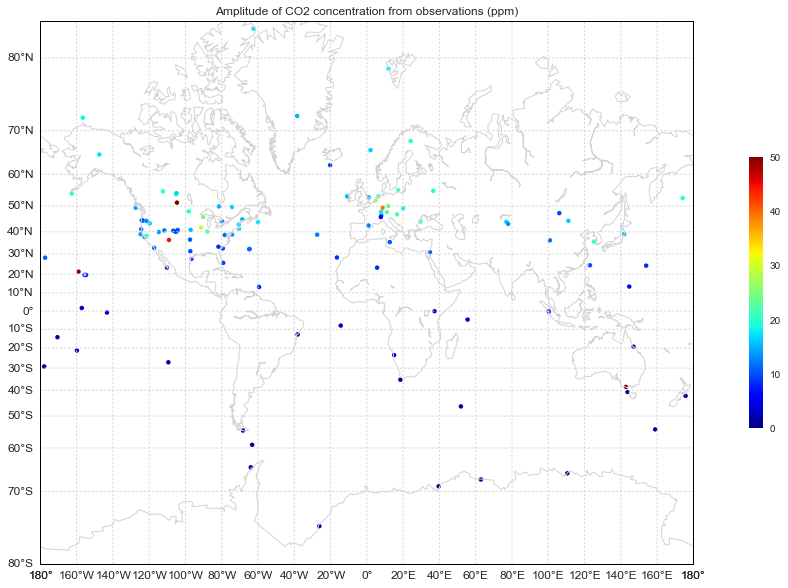

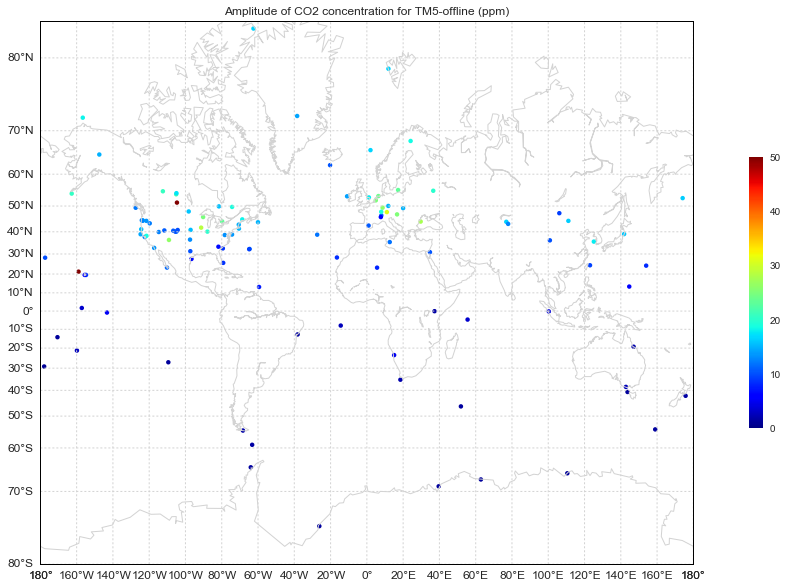

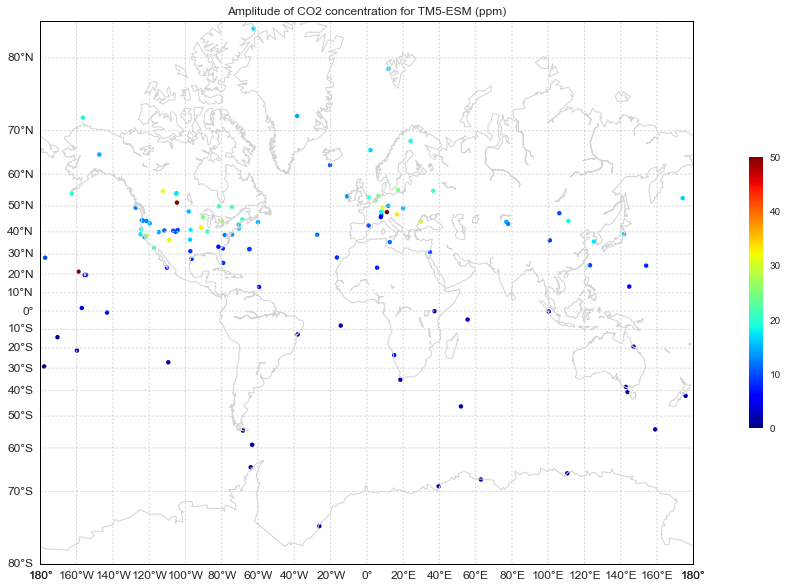

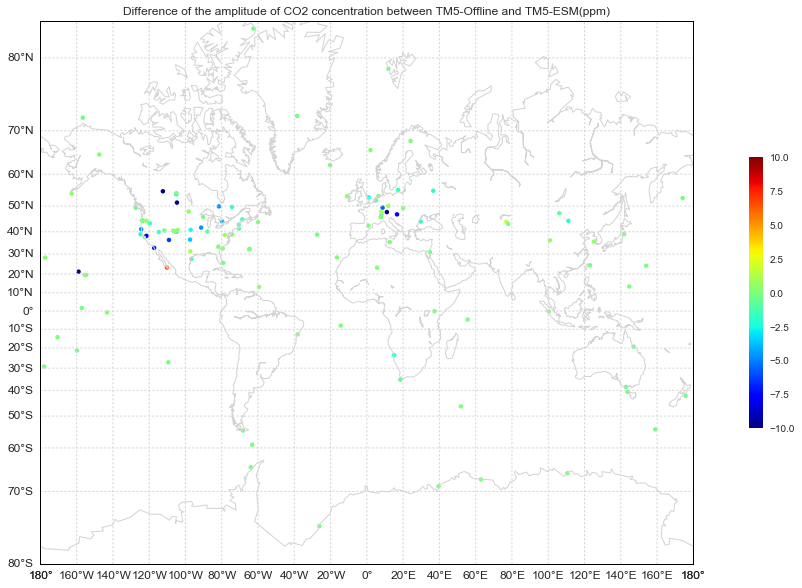

In [425]:
plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=83,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False],color='lightgrey')
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration from observations (ppm)")
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = np.min(plot_df['amp_obs'].values)
max_value = np.max(plot_df['amp_obs'].values)
min_value=0
max_value=50
sc = plt.scatter(x,y, c=plot_df['amp_obs'].values, vmin=min_value, vmax =max_value, cmap=jet, s=20, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('')
plt.savefig('ccgcrv_amplitude_observations.png')
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=83,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False],color='lightgrey')
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration for TM5-offline (ppm)")
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = np.min(plot_df['amp_mp'].values)
max_value = np.max(plot_df['amp_mp'].values)
min_value=0
max_value=50
sc = plt.scatter(x,y, c=plot_df['amp_mp'].values, vmin=min_value, vmax =max_value, cmap=jet, s=20, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('')
plt.savefig('ccgcrv_amplitude_TM5-offline.png')
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=83,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False],color='lightgrey')
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Amplitude of CO2 concentration for TM5-ESM (ppm)")
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = np.min(plot_df['amp_esm'].values)
max_value = np.max(plot_df['amp_esm'].values)
min_value=0
max_value=50
sc = plt.scatter(x,y, c=plot_df['amp_esm'].values, vmin=min_value, vmax =max_value, cmap=jet, s=20, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('')
plt.savefig('ccgcrv_amplitude_tm5-esm.png')
plt.show()

plt.figure(figsize=(20,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=83,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines(color='lightgrey')
#m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False],color='lightgrey')
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True],color='lightgrey')
m.drawmapboundary(fill_color='white')
plt.title("Difference of the amplitude of CO2 concentration between TM5-Offline and TM5-ESM(ppm)")
# Define a colormap
jet = plt.cm.get_cmap('jet')
# Transform points into Map's projection
x,y = m(plot_df['F_lon'].values, plot_df['E_lat'].values)
# Color the transformed points!
# Obtain min and max, for the colorbar
min_value = -10
max_value = np.max(plot_df['offline-esm'].values)
max_value=10
sc = plt.scatter(x,y, c=plot_df['offline-esm'].values, vmin=min_value, vmax =max_value, cmap=jet, s=20, edgecolors='none')
# And let's include that colorbar 
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('')
plt.savefig('ccgcrv_amplitude_difference.png')
plt.show()